In [2]:
import pandas as pd
import numpy as np

### Open file

In [17]:
df_person_info=pd.read_csv('Perosn_period.csv', index_col=0)
df_person_info

,Full name,Link,Year,Month,short month,month_number,period
0,Яровий Дмитро Вікторович,https://uk.wikipedia.org/wiki/%D0%AF%D1%80%D0%...,1977,27 травня,травня,5,2 spring
1,Швець Борис Олександрович,https://uk.wikipedia.org/wiki/%D0%A8%D0%B2%D0%...,1991,20 серпня,серпня,8,3 summer
2,Чуніховська Ірина Володимирівна,https://uk.wikipedia.org/wiki/%D0%A7%D1%83%D0%...,1967,16 липня,липня,7,3 summer
3,Челомбітько Євген,https://uk.wikipedia.org/wiki/%D0%A7%D0%B5%D0%...,1965,22 листопада,листопада,11,4 autumn
4,Хайндрава Сергій,https://uk.wikipedia.org/wiki/%D0%A5%D0%B0%D0%...,1961,10 жовтня,жовтня,10,4 autumn
...,...,...,...,...,...,...,...
8815,Болдирєв Даниїл Владиславович,https://uk.wikipedia.org/wiki/%D0%91%D0%BE%D0%...,1992,15 травня,травня,5,2 spring
8816,Боков Олексій Сергійович,https://uk.wikipedia.org/wiki/%D0%91%D0%BE%D0%...,1957,30 березня,березня,3,2 spring
8818,Ковальов Сергій Вікторович (альпініст),https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D0%...,1966,13 серпня,серпня,8,3 summer
8819,Антонов Віталій Борисович,https://uk.wikipedia.org/wiki/%D0%90%D0%BD%D1%...,1962,12 грудня,грудня,12,1 winter


<Axes: xlabel='month_number'>

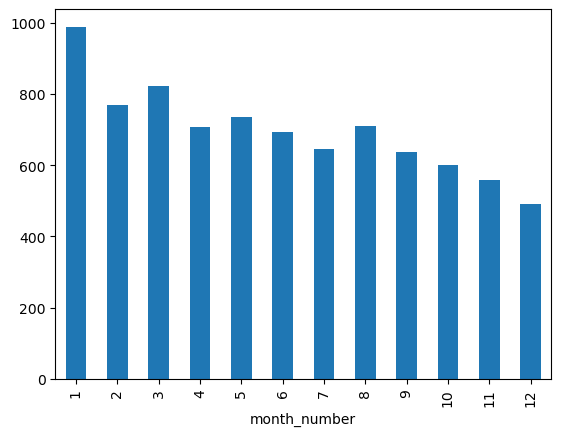

In [20]:
group_month = df_person_info.groupby([ 'month_number'])['Link'].count()#.reset_index()
group_month.plot.bar()


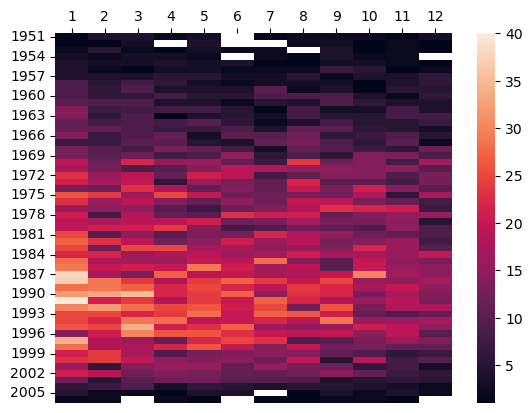

In [19]:
import seaborn as sns
df_for_pivot = df_person_info.groupby(['Year', 'month_number'])['Link'].count().reset_index()
df_pivot=df_for_pivot.pivot(index="Year", columns="month_number", values="Link")
ax = sns.heatmap(df_pivot)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

<Axes: xlabel='month_short'>

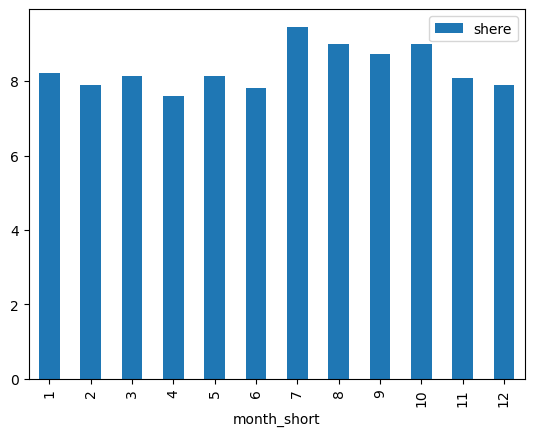

In [7]:
df_coef_month=pd.read_csv('coefficient month.csv', index_col=0)
df_coef_month.plot.bar()

### Total number Perosn 

In [21]:
#result = df_person_info.groupby(['Year','month_number', 'period'])['Link'].count().reset_index()
result = df_person_info.groupby(['month_number'])['Link'].count().reset_index()
result=result.rename(columns={"Link": "count"})
result


,month_number,count
0,1,989
1,2,768
2,3,824
3,4,707
4,5,735
5,6,693
6,7,647
7,8,710
8,9,638
9,10,602


In [22]:
df_coef_month

,shere
month_short,
1,8.215084
2,7.909194
3,8.144557
4,7.597632
5,8.128993
6,7.812092
7,9.460962
8,9.012697
9,8.742796


In [23]:
'''
If the data is distributed evenly, then for each month, it share should be 100/12=8.3333
'''

df=result.merge(df_coef_month, left_on='month_number', right_on='month_short')
#total_sum=df['count'].sum()
df['weight count']=(df['count']*8.333333333)/df['shere']
df=df.set_index('month_number')

<Axes: xlabel='month_number'>

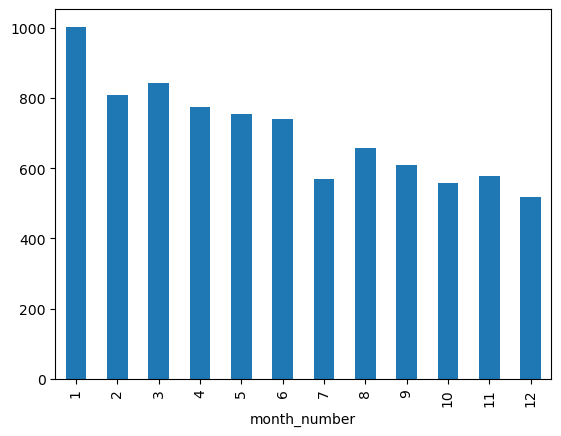

In [24]:
df['weight count'].plot.bar()